<a href="https://colab.research.google.com/github/seodaegal/Textmining/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94_%ED%8F%89%EC%A0%90_%EA%B0%90%EC%84%B1_%EB%B6%84%EC%84%9D_%EA%B9%80%EC%84%9C%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (18.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# 데이터 불러오기
import os
path = '/content/drive/MyDrive/딥다이브/3강'
filename = '[네이버 영화] 영화 평점 (1).csv'
df = pd.read_csv(os.path.join(path, filename))

In [ ]:
df.head()

,영화,작성자,날짜,평점,코멘트
0,주홍글씨,ewae****,21.11.29,1,djdjdkdjdbev
1,주홍글씨,egg3****,21.11.23,5,감독 욕심으로 좋은 배우들 생고생만 시킨 중2병 영화. 그 와중에 한석규 연기는 살...
2,주홍글씨,hyuk****,21.11.14,10,영화관에서보고 제법 충격적이였는데..고이은주님을 다시볼수있어서 10점입니다. 영화보...
3,주홍글씨,nimu****,21.11.07,6,The Scarlet Letter
4,주홍글씨,ppms****,21.11.03,1,정말 재미 없는 영화입니다


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58699 entries, 0 to 58698
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화      58699 non-null  object
 1   작성자     58699 non-null  object
 2   날짜      58699 non-null  object
 3   평점      58699 non-null  int64 
 4   코멘트     58362 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [ ]:
!pip install konlpy

from konlpy.tag import Okt
okt = Okt()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.1 MB/s eta 0:00:00


In [ ]:
df['코멘트 전처리'] = df['코멘트'].astype(str).map(okt.nouns)

In [ ]:
df #어어아어윧ㅍ

,영화,작성자,날짜,평점,코멘트,코멘트 전처리
0,주홍글씨,ewae****,21.11.29,1,djdjdkdjdbev,[]
1,주홍글씨,egg3****,21.11.23,5,감독 욕심으로 좋은 배우들 생고생만 시킨 중2병 영화. 그 와중에 한석규 연기는 살...,"[감독, 욕심, 배우, 생, 고생, 중, 병, 영화, 그, 와중, 한석규, 연기]"
2,주홍글씨,hyuk****,21.11.14,10,영화관에서보고 제법 충격적이였는데..고이은주님을 다시볼수있어서 10점입니다. 영화보...,"[영화관, 보고, 제법, 충격, 이은주, 다시, 점, 영화, 은주, 감정, 이입, ..."
3,주홍글씨,nimu****,21.11.07,6,The Scarlet Letter,[]
4,주홍글씨,ppms****,21.11.03,1,정말 재미 없는 영화입니다,"[정말, 재미, 영화]"
...,...,...,...,...,...,...
58694,처음 만나는 자유,audi****,04.09.05,10,"비수같이 꽂히는 대사들,,채널을 돌릴수없게만든 영화,,정말 멋있다","[비수, 대사, 채널, 영화, 정말]"
58695,처음 만나는 자유,ssah****,04.07.28,9,"자유를 찾는한, 사람은 미쳐간다","[자유, 사람, 간다]"
58696,처음 만나는 자유,carp****,04.07.05,8,"색다른 영화, 아쉬운 건 졸리의 연기에 가려진 위노나...","[영화, 건, 졸리, 연기, 가려진, 위노나]"
58697,처음 만나는 자유,jemm****,04.06.25,10,지금 내 삶을 재평가할 수 있었던 영화,"[지금, 내, 삶, 재, 평가, 수, 영화]"


In [ ]:
df[1:20]

,영화,작성자,날짜,평점,코멘트,코멘트 전처리,label
1,주홍글씨,egg3****,21.11.23,5,감독 욕심으로 좋은 배우들 생고생만 시킨 중2병 영화. 그 와중에 한석규 연기는 살...,감독 욕심 배우 생 고생 중 병 영화 그 와중 한석규 연기,0
2,주홍글씨,hyuk****,21.11.14,10,영화관에서보고 제법 충격적이였는데..고이은주님을 다시볼수있어서 10점입니다. 영화보...,영화관 보고 제법 충격 이은주 다시 점 영화 은주 감정 이입 마음 하늘,1
3,주홍글씨,nimu****,21.11.07,6,The Scarlet Letter,,0
4,주홍글씨,ppms****,21.11.03,1,정말 재미 없는 영화입니다,정말 재미 영화,0
5,주홍글씨,kyb8****,21.10.23,1,진짜 별로 개별로 감독이 미x사람,진짜 별로 개별 감독 사람,0
7,주홍글씨,jush****,21.10.15,1,"배드씬을 33번이나 찍었다는 그영화,,",배드씬 번 영화,0
8,주홍글씨,shut****,21.10.12,1,ㅆ ㅡ레기같은 감독 살인자,레기같 감독 살인자,0
9,주홍글씨,axlr****,21.10.11,1,이은주씨가 이 영화 안찍었으면 지금 살아있겠죠? 꽃다운 어린 이은주씨에게 정사씬을 ...,이은주 이 영화 지금 꽃 다운 이은주 정사씬 차례 요구 이은주 죽음 갈수 한석규 이...,0
10,주홍글씨,iwai****,21.09.04,5,#오늘본영화 #한줄평주홍글씨 : 사랑보다 낯선☆2.5영화에서 “총”은 남성의 성적욕...,사랑 낯선 영화 총 은 남성 성적 욕망 암시 발 은 욕망 상징 담배 이상 과 권위 ...,0
11,주홍글씨,gori****,21.09.04,1,비추합니다 이런 영화는 최악입니다,영화 최악,0


In [ ]:
df['코멘트 전처리'] = df['코멘트 전처리'].map(' '.join)

In [ ]:
# 결측치 확인
df[df['코멘트 전처리'].isnull()]

,영화,작성자,날짜,평점,코멘트,코멘트 전처리


In [ ]:
df.dropna(inplace = True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

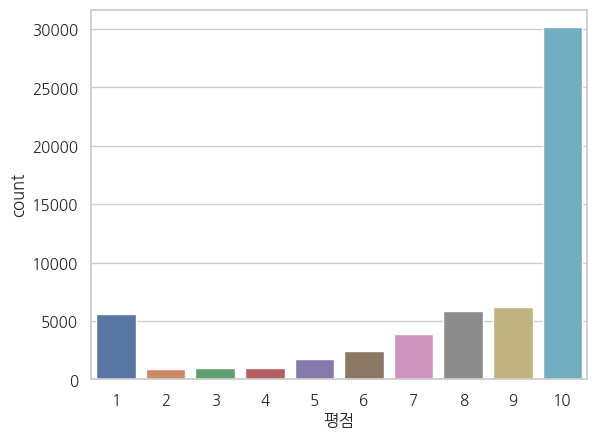

In [ ]:
# 평점 별 개수 확인
sns.set_theme(font ='NanumGothic',
        	rc = {'axes.unicode_minus' : False},
        	style ='whitegrid')
sns.countplot(data = df, x= '평점') #값을 세는
plt.show()

In [ ]:
# 감정 라벨링
df['label'] = df['평점'].map(lambda x : 1 if x > 6 else 0); df

,영화,작성자,날짜,평점,코멘트,코멘트 전처리,label
0,주홍글씨,ewae****,21.11.29,1,djdjdkdjdbev,,0
1,주홍글씨,egg3****,21.11.23,5,감독 욕심으로 좋은 배우들 생고생만 시킨 중2병 영화. 그 와중에 한석규 연기는 살...,감독 욕심 배우 생 고생 중 병 영화 그 와중 한석규 연기,0
2,주홍글씨,hyuk****,21.11.14,10,영화관에서보고 제법 충격적이였는데..고이은주님을 다시볼수있어서 10점입니다. 영화보...,영화관 보고 제법 충격 이은주 다시 점 영화 은주 감정 이입 마음 하늘,1
3,주홍글씨,nimu****,21.11.07,6,The Scarlet Letter,,0
4,주홍글씨,ppms****,21.11.03,1,정말 재미 없는 영화입니다,정말 재미 영화,0
...,...,...,...,...,...,...,...
58694,처음 만나는 자유,audi****,04.09.05,10,"비수같이 꽂히는 대사들,,채널을 돌릴수없게만든 영화,,정말 멋있다",비수 대사 채널 영화 정말,1
58695,처음 만나는 자유,ssah****,04.07.28,9,"자유를 찾는한, 사람은 미쳐간다",자유 사람 간다,1
58696,처음 만나는 자유,carp****,04.07.05,8,"색다른 영화, 아쉬운 건 졸리의 연기에 가려진 위노나...",영화 건 졸리 연기 가려진 위노나,1
58697,처음 만나는 자유,jemm****,04.06.25,10,지금 내 삶을 재평가할 수 있었던 영화,지금 내 삶 재 평가 수 영화,1


In [ ]:
from sklearn.model_selection import train_test_split #학습 데이터를 쪼개주는/분리해주는
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# 데이터 스플릿(훈련 데이터와 테스트 데이터)
train_texts, test_texts, train_labels, test_labels = train_test_split(df['코멘트 전처리'], df['label'], test_size=0.3, random_state=0) #random_state는 랜덤하게 추출(이 지점에서 0.3 확률로)

In [ ]:
# train_texts 확인
train_texts

55764                                                담배 장면
46418                                           한번 더 좀더 이해
8984                                       최고 영화 감동 임창정 연기
46018    프랑스 화일 예술 외설 차이 프랑스 다운 혼돈 시대 얘술 그 표현 우리나라 사람 절...
14595                                                   대박
                               ...                        
46157                                                영상 음악
52703                                                정말 후회
42856                                             햇살 영화 하나
43831                                           운명 사람 만날 수
2770                                                 제발 편좀
Name: 코멘트 전처리, Length: 40853, dtype: object

In [ ]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer(min_df=1, norm='l2', ngram_range=(1,1))
train_features = vectorizer.fit_transform(train_texts)

In [ ]:
# LogisticRegression
model= LogisticRegression(C=0.8)

In [ ]:
# LogisticRegression 모델에 훈련 데이터 학습
model.fit(train_features, train_labels)

LogisticRegression(C=0.8)

In [ ]:
# 테스트 데이터 벡터화
test_features=vectorizer.transform(test_texts)

In [ ]:
# 훈련시킨 모델로 테스트 데이터 예측
model.predict(test_features)

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# 정확도 테스트
pred_labels = model.predict(test_features)
print('잘못 분류된 리뷰: {} out of {}'.format((pred_labels != test_labels).sum(),len(test_labels)))
print('Accuracy: %.2f' % accuracy_score(test_labels, pred_labels))

잘못 분류된 리뷰: 3299 out of 17509
Accuracy: 0.81


In [ ]:
# 사용된 단어 리스트
vocablist = [word for word, _ in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])]

In [ ]:
# 가중치 계산 양수면 긍정, 음수면 부정
coefficients =  model.coef_.tolist()

sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)
# 학습에 사용된 각 단어마다의 coefficient (즉 weight) 값이 존재

In [ ]:
# 긍정단어 TOP 50
for word, coef in sorted_coefficients[:50]:
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))

최고 (3.756)
감동 (2.192)
가슴 (1.880)
명작 (1.872)
최고다 (1.844)
정말 (1.775)
하울 (1.716)
눈물 (1.673)
다시 (1.659)
인생 (1.432)
강추 (1.405)
여운 (1.379)
지금 (1.337)
만점 (1.321)
대박 (1.299)
마음 (1.224)
진짜 (1.130)
몇번 (1.106)
쵝오 (0.984)
보고 (0.962)
소름 (0.943)
이병헌 (0.933)
간만 (0.923)
스타워즈 (0.899)
역시 (0.899)
사랑 (0.892)
이영화 (0.865)
볼때 (0.847)
우리 (0.839)
오늘 (0.836)
펑펑 (0.823)
데이먼 (0.822)
가장 (0.812)
조승우 (0.794)
진영화 (0.778)
음악 (0.761)
모두 (0.736)
이제야 (0.736)
수작 (0.722)
걸작 (0.712)
초원 (0.709)
노래 (0.706)
한번 (0.704)
질리 (0.696)
슬픔 (0.685)
콘스탄틴 (0.678)
시리즈 (0.653)
세상 (0.652)
제일 (0.649)
대작 (0.646)


In [ ]:
# 부정단어 TOP 50
for word, coef in sorted_coefficients[-50:]:
    print('{0:} ({1:.3f})'.format(vocablist[word], coef))

어이 (-0.607)
정신 (-0.620)
점수 (-0.621)
약간 (-0.623)
부족 (-0.633)
수준 (-0.634)
장난 (-0.636)
대체 (-0.656)
이건 (-0.685)
졸작 (-0.690)
점도 (-0.699)
몽정기 (-0.710)
유치 (-0.730)
트렁크 (-0.743)
포스터 (-0.757)
도대체 (-0.765)
전형 (-0.790)
만하 (-0.793)
차라리 (-0.801)
갈수록 (-0.812)
그닥 (-0.817)
설정 (-0.833)
나름 (-0.850)
짜증 (-0.865)
지루 (-0.883)
시간 (-0.897)
조금 (-0.901)
예고편 (-0.907)
감독 (-0.909)
결말 (-0.941)
이하 (-0.942)
스토리 (-0.954)
글쎄 (-0.968)
킬링타임 (-0.971)
코미디 (-0.999)
별루 (-1.010)
지루함 (-1.086)
억지 (-1.096)
내용 (-1.101)
그다지 (-1.139)
비디오 (-1.155)
전개 (-1.165)
뭔가 (-1.178)
소재 (-1.243)
무난 (-1.306)
그냥 (-1.479)
실망 (-1.973)
쓰레기 (-2.200)
최악 (-2.287)
별로 (-2.324)
